In [1]:
### Controversia en Youtube.
### Cyn, Caro

## CONTROVERSIAL: More than 3,000 of dislikes
## SUCCESS:  More than 2,000,000 of views
## TRENDING: Video located on the Top 200 view videos of the day.
## Dataset from Kaggle, for 40949 Trending videos, over USA.
## from November 2017 - June 2018.

# Info provided for the dataset:
#        ['id'
#       'trending_date'
#       'title'
#       'channel_title'
#       'category_id'
#       'publish_time'
#       'tags'
#       'views'
#       'likes'
#       'dislikes'
#       'comment_count'
#       'thumbnail_link'
#       'comments_disabled'
#       'ratings_disabled'
#       'video_error_or_removed'
#       'description']

## Ho = There is no statistically significant relationship between dislikes and number of views.



In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json 
import sys
import os 

In [3]:
# Read original dataset. Date range varies from Nov 2017 up to June 2018
us_csv = "Resources/large_USvideos.csv"
original_df = pd.read_csv(us_csv)

# original_df.head()

In [4]:
# Rename video_id column
df= original_df.rename(columns={"video_id": "id"})

# Convert column Title to propper case  
df["title"] = df.title.str.capitalize()

# Deleting columns with no info 
del df['ratings_disabled']
del df['comments_disabled']
del df['video_error_or_removed']
del df['thumbnail_link']
del df['description']

df.head()

,id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count
0,2kyS6SvSYSE,17.14.11,We want to talk about our marriage,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954
1,1ZAPwfrtAFY,17.14.11,The trump presidency: last week tonight with j...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703
2,5qpjK5DgCt4,17.14.11,"Racist superman | rudy mancuso, king bach & le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181
3,puqaWrEC7tY,17.14.11,Nickelback lyrics: real or fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146
4,d380meD0W0M,17.14.11,I dare you: going bald!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518


## Data Cleanup 

In [5]:
# Count how many videos are in the data Frame:
print("Total number of videos on the DataFrame, ordered by more trending days:")
df["id"].value_counts()

# Video j4KvrAUjn6c  was trending during  30 days.

Total number of videos on the DataFrame, ordered by more trending days:


j4KvrAUjn6c    30
r-3iathMo7o    29
QBL8IRJ5yHU    29
8h--kFui1JA    29
t4pRQ0jn23Q    29
iILJvqrAQ_w    29
NBSAQenU2Bk    29
MAjY8mCTXWk    29
ulNswX3If6U    28
WIV3xNz8NoM    28
vjSohj-Iclc    28
2PH7dK6SLC8    28
YI3tsmFsrOg    28
6S9c5nnDd_s    28
UfKmSfgFxi8    28
mdWcaWBxxcY    28
pFc6I0rgmgY    27
H7gh2fmdjCU    27
Xpv-sEKl1B4    27
0zZ0Y_UZRBw    27
nRc0kmOYgzQ    27
TjXQzRWmb_I    27
1purAy2MsOc    27
BspHjvU11y4    27
6SuMbFuKDf8    27
-kTWIm7m4Uw    27
um-1fAVU1OQ    27
ooyjaVdt-jA    26
D6Oy4LfoqsU    26
ju_inUnrLc4    26
               ..
CiaoTcPpbDE     1
PitmObjGur4     1
Mfiim71QdYQ     1
OU9IwxU7N78     1
WIkBvAmXyGU     1
bgV4A0GGBnQ     1
zkrq7Kpd1so     1
LJdfE2Keno8     1
x3ch1ajtwbc     1
Djw1PmpZt9w     1
4Syrtc5aRBY     1
Vvya3yofDY4     1
UYZ1WjJI1NM     1
uyl6WtHEYOQ     1
NeH_wFJ8lZc     1
guI0Ydh7wT0     1
z7BOWQihC7M     1
SYVSeH6sYYU     1
deJCEUFeehI     1
J-7FkW1Cuic     1
jr8L_hJcCM4     1
I5X3vC-XsU0     1
zGD3Qvb04gc     1
8hKbIhrb1WU     1
mv73u5qHf0

In [6]:
# another way:
# Count how many days each video was trending 
video_by_id = df.set_index("id").groupby(["id"])
video_trending_count = video_by_id.count()["title"]
print("Total trending days of each video:")
video_trending_count.sort_values(ascending=False).head()

Total trending days of each video:


id
j4KvrAUjn6c    30
QBL8IRJ5yHU    29
t4pRQ0jn23Q    29
iILJvqrAQ_w    29
8h--kFui1JA    29
Name: title, dtype: int64

### Question. Does the category influence the quantity of views?

In [7]:
# Creating a DataFrame of videos with more days as "trending" (video_count)

video_frequence_df = df.groupby(['id', 'category_id'])['id'].agg(
                {"video_frequence": len
                }).sort_values("video_frequence", ascending=False).reset_index()

#video_frequence_df.head()


C:\Users\BohuCyn\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


In [8]:
# Category frequence on trending videos:
category_frequence = video_frequence_df.groupby("category_id").id.nunique()
category_frequence.sort_values(ascending=False)
category_frequence_df = pd.DataFrame(category_frequence) 
category_frequence_df= category_frequence_df.rename(columns={'id': "category_frequence"})
category_frequence_df.sort_values('category_frequence',ascending=False).head(100)

,category_frequence
category_id,
24,1622
10,801
26,595
23,547
25,507
22,498
17,452
28,381
1,321


In [9]:
category_frequence_df.describe()

,category_frequence
count,16.000000
mean,398.000000
std,404.240687
min,4.000000
25%,95.000000
50%,351.000000
75%,517.000000
max,1622.000000


In [10]:
# Read the Json File with categories names and Id so we can show names in the plot
from pprint  import pprint 
filepath = os.path.join("Resources/US_category_id.json")
with open(filepath) as jsonfile:
    categories_data = json.load(jsonfile)
# See the json 
pprint(categories_data)

{'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
            'id': '1',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Film & Animation'}},
           {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
            'id': '2',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Autos & Vehicles'}},
           {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
            'id': '10',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Music'}},
 

In [11]:
## Categories relevance over the total trending videos:
x = 0 
category_id_list = []
category_name_list = []
for x in range(32):
    category_id = categories_data["items"][x]["id"]
    category_name = categories_data["items"][x]["snippet"]["title"] 
    x = x+1
    category_id_list.append(category_id)
    category_name_list.append(category_name)
    

categories_df = pd.DataFrame({ "category_id":category_id_list,
                               "category_name":category_name_list})

categories_df['category_id']=categories_df['category_id'].astype(int)
categories_df.head(50)
category_percentage= (category_frequence_df["category_frequence"]/len(df["id"].value_counts()))*100
category_percentage

# Kindly note: 25% of the trending videos trough Nov17 since Jun18 was from Category 24. 

category_id
1      5.054322
2      1.117934
10    12.612187
15     2.220123
17     7.116989
19     0.944733
20     1.621792
22     7.841285
23     8.612817
24    25.539285
25     7.982995
26     9.368603
27     3.952134
28     5.999055
29     0.220438
43     0.062982
Name: category_frequence, dtype: float64

In [12]:
# Read the Json File with categories names and Id so we can show names in the plot

filepath = os.path.join("Resources/US_category_id.json")
with open(filepath) as jsonfile:
    categories_data = json.load(jsonfile)
# See the json 
# categories_data

In [13]:
# Add a new column to transform category id into names 
category_frequence_df = pd.merge(category_frequence_df,categories_df,how='left',left_on='category_id',right_on='category_id')
category_frequence_df.sort_values('category_frequence',ascending=False).head()

,category_id,category_frequence,category_name
9,24,1622,Entertainment
2,10,801,Music
11,26,595,Howto & Style
8,23,547,Comedy
10,25,507,News & Politics


In [14]:
def video_category_name(dF): 
    for index,row in category_frequence_df.iterrows():
        x = row['category_id']
        #x = category_frequence_df.loc[index,'category_id'] 
        if  x == categories_data["items"][0]["id"]: 
            try:
                category_frequence_df.loc[index,"category_name"] = categories_data["items"][0]["snippet"]["title"] 
            except:
                pass
video_category_name(category_frequence_df)
category_frequence_df.sort_values('category_frequence',ascending=False).head() 

,category_id,category_frequence,category_name
9,24,1622,Entertainment
2,10,801,Music
11,26,595,Howto & Style
8,23,547,Comedy
10,25,507,News & Politics


In [15]:
# Kindly note: 25% of the trending videos trough Nov17 since Jun18 was from Category 24. Entertainment.


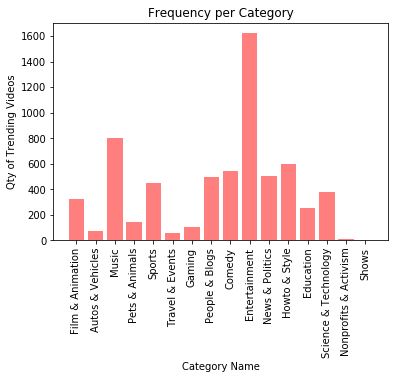

In [16]:
#category_frequence_df.plot(category_name, category_frequence, kind="bar", figsize=(20,3))
plt.bar(category_frequence_df['category_name'], category_frequence_df['category_frequence'], facecolor="red", alpha=0.50, align="center")
plt.xticks(rotation=90)
plt.title("Frequency per Category")
plt.xlabel("Category Name")
plt.ylabel("Qty of Trending Videos")
plt.savefig("Images/Frequency per Category.png")


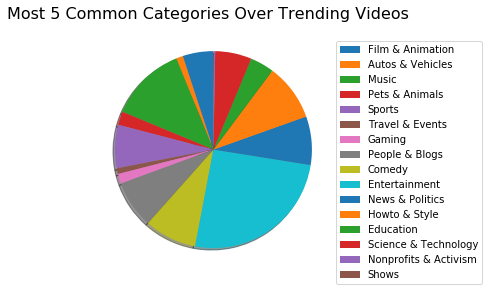

In [66]:
# Plot based on Data Frame of Category frequence
category_frequence = category_frequence_df['category_frequence']
category_name = category_frequence_df['category_name']
category_name.head()

#explode = (0.07, 0, 0, 0, 0)
#colors = [ '#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80',]
plt.suptitle('Most 5 Common Categories Over Trending Videos', size=16, y=1)
plt.pie(category_frequence, shadow=True, startangle=90)
plt.axis("equal")
labels = category_frequence_df['category_name']
#plt.legend(labels,loc=3)
plt.legend(labels, bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.savefig("Images/Most 5 Common Categories Over Trending Videos.png")
plt.show()
#explode=explode,

### Question. Does the channel influence the number of views on a video?

In [17]:
# LIst with the Top channels with more trending videos.

trending_videos_per_channel= pd.DataFrame(df.groupby("channel_title").id.nunique().sort_values(ascending=False))
trending_videos_per_channel.reset_index(inplace=True)
trending_videos_per_channel.head(20)


## Notar que video con mas dias trending, es de categoria entretenimiento y su canal en el rango de tiempo solamnete tuvo dos videos trending.
## mientras que el canal con mas videos trending en el total de tiempo es ESPN con 84 videos trending en el mismo tiempo.



,channel_title,id
0,ESPN,84
1,TheEllenShow,74
2,The Tonight Show Starring Jimmy Fallon,72
3,Jimmy Kimmel Live,70
4,The Late Show with Stephen Colbert,58
5,Netflix,58
6,NBA,55
7,CNN,52
8,Vox,47
9,The Late Late Show with James Corden,46


In [18]:
# Display a statistical overview about channels of trending videos.
trending_videos_per_channel.describe()

,id
count,2207.000000
mean,2.883552
std,5.721041
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,84.000000


In [19]:
# set x, y axis and tick locations:
trending_videos_per_channel_new=trending_videos_per_channel[:20]
x_axis= trending_videos_per_channel_new["channel_title"]
y_axis= trending_videos_per_channel_new["id"]
tick_locations = [value for value in x_axis]

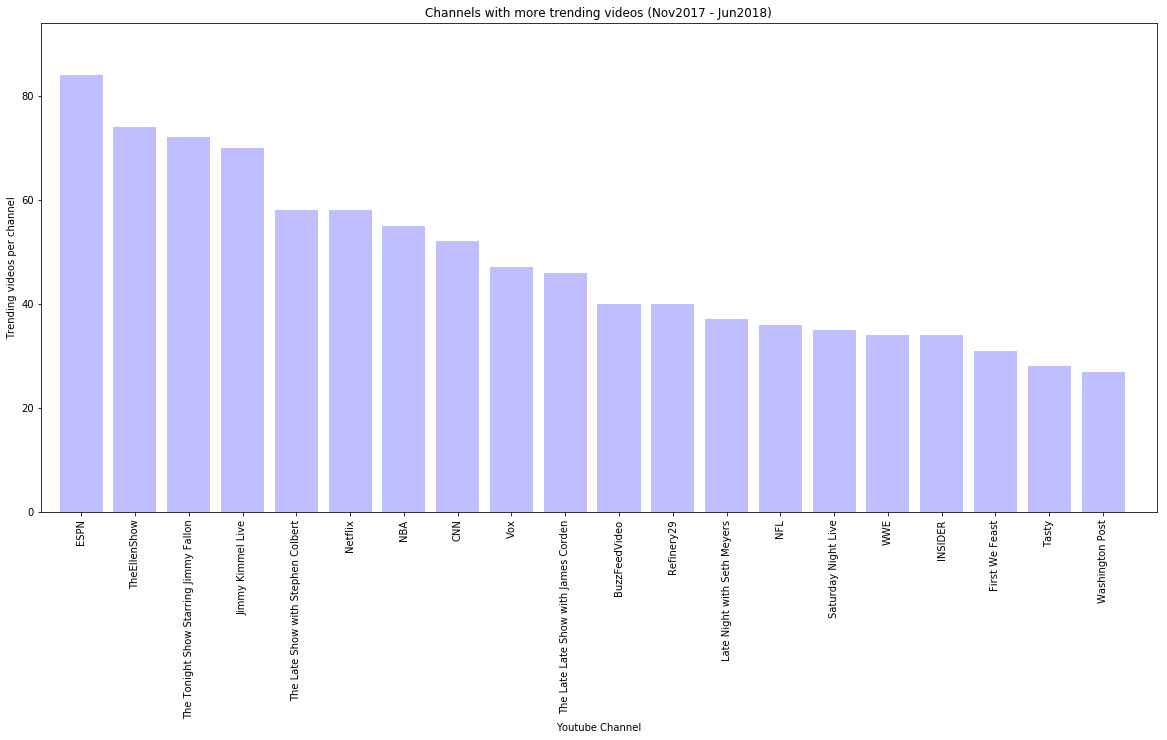

In [20]:
plt.figure(figsize=(20,9))
# Create a bar chart based upon the above data
top_channel_plot= plt.bar(x_axis, y_axis, color="b", alpha=0.25, align="center") 
plt.xticks(tick_locations,trending_videos_per_channel_new["channel_title"], rotation="vertical")
# set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0,max(trending_videos_per_channel_new["id"])+10)

# Set a Title and labels
plt.title("Channels with more trending videos (Nov2017 - Jun2018)")
plt.xlabel("Youtube Channel")
plt.ylabel("Trending videos per channel")

# set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0,max(trending_videos_per_channel_new["id"])+10)
# set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0,max(trending_videos_per_channel_new["id"])+10)
plt.savefig("Images/Q2.Channels with more Trending Videos (Nov17 - Jun18).png")


In [21]:
## Channels with more views:

video_channel_views= df.set_index("id").groupby(["channel_title"])
channel_views = video_channel_views.max()["views"]
channel_views_df = pd.DataFrame(channel_views)
channel_views_df = channel_views_df.groupby(['channel_title']).head()
channel_views_df.sort_values("views",ascending=False)

# Please note ChildishGambinoVEVO only have one trending video, 
# and the views were higher than the sum of the rest of views of trending videos per channels.

,views
channel_title,
ChildishGambinoVEVO,225211923
YouTube Spotlight,149376127
ArianaGrandeVevo,148689896
BeckyGVEVO,139334502
ibighit,123010920
TheWeekndVEVO,122544931
LuisFonsiVEVO,102012605
Cardi B,94254507
Marvel Entertainment,91933007


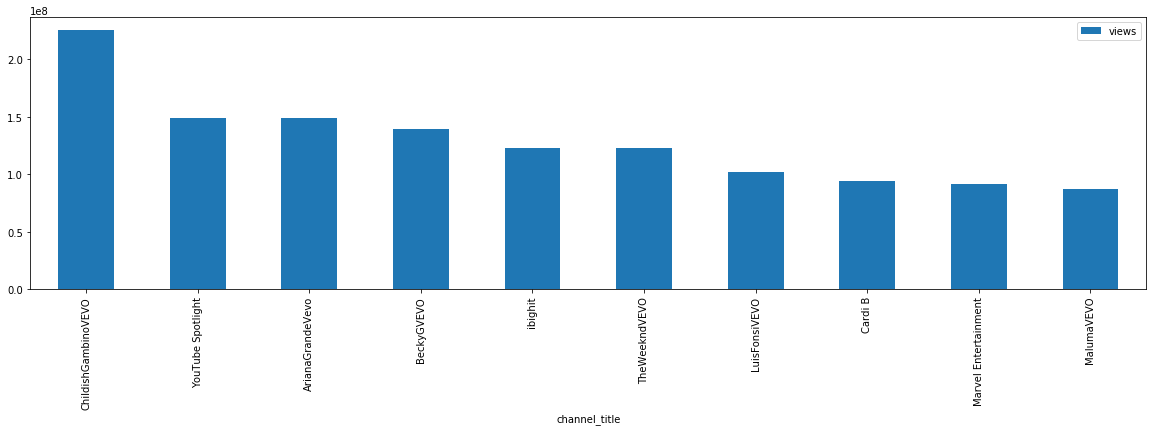

In [22]:
# Plot channels with more views 
channels_views_plot_df = channel_views_df.sort_values("views",ascending=False)
channels_views_plot_df = channels_views_plot_df[:10]
channels_more_views_plot = channels_views_plot_df.plot(kind="bar", figsize=(20,5))
plt.xticks(rotation="vertical")
plt.savefig("Images/Q2.Channels with more views (Nov17 - Jun18).png")

In [23]:
channel_comparison_df = pd.merge(trending_videos_per_channel, channel_views_df, on="channel_title")
channel_comparison_df.sort_values("views",ascending=False).head()

,channel_title,id,views
1116,ChildishGambinoVEVO,1,225211923
498,YouTube Spotlight,3,149376127
468,ArianaGrandeVevo,3,148689896
854,BeckyGVEVO,1,139334502
132,ibighit,9,123010920


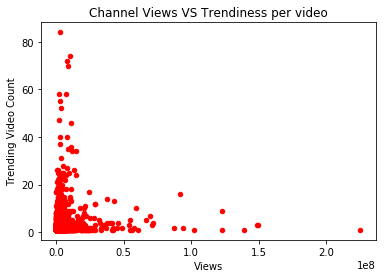

<Figure size 432x288 with 0 Axes>

In [24]:
channel_comparison_plot = channel_comparison_df.plot.scatter(x='views',y='id' , marker="o", color="red")

plt.title("Channel Views VS Trendiness per video")
plt.xlabel("Views")
plt.ylabel("Trending Video Count")
plt.show()
plt.savefig("Images/Q2.Channels Views VS Video Count.png")

# Please note: there is no relation between be more tie trnding and get more views.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

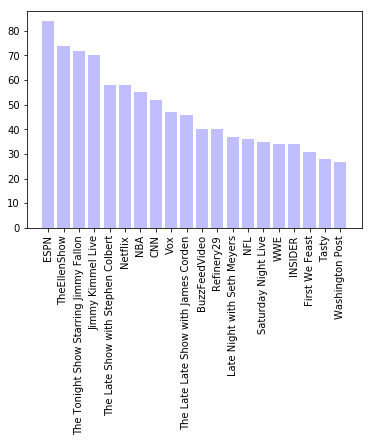

In [25]:
# set x, y axis and tick locations:
trending_videos_per_channel=trending_videos_per_channel[:20]
x_axis= trending_videos_per_channel["channel_title"]
y_axis= trending_videos_per_channel["id"]
tick_locations = [value for value in x_axis]

top_channel_views_plot= plt.bar(x_axis, y_axis, color="b", alpha=0.25, align="center")
plt.xticks(rotation="vertical")

In [26]:
## video with most views:

video_by_id = df.set_index("id").groupby(["id"])
top100videos_views = video_by_id.max()["views"]
top100videos_views_df = pd.DataFrame(top100videos_views)
top100videos_views_df = top100videos_views_df.groupby(['id']).head()
topvideos_views_df = top100videos_views_df.groupby(['id']).head()
top100videos_views_df.sort_values("views",ascending=False).head()


,views
id,
VYOjWnS4cMY,225211923
FlsCjmMhFmw,149376127
ffxKSjUwKdU,148689896
zEf423kYfqk,139334502
7C2z4GqqS5E,123010920


In [27]:
# el video "VYOjWnS4cMY" dura 4min  tiene 225211923 views:
# dato curioso
tiempo=( 225211923 * 4 )/60
((tiempo/24)/365)

1713.9415753424655

In [28]:
## Resumen 1:

# video mas tiempo trending:"j4KvrAUjn6c" 30 dias trending 10,381,263 views, 
# representa el 4.6% de views respecto al video que mas views tiene.
# likes: 163,325 dislikes:20,892 comments:25,323

# video con mas views :"VYOjWnS4cMY" 25 dias trending 225,211,923 views, representa en tiempo 1713.94 anos.
# likes: 5,023,450 dislikes:343,541 comments:517,232

# canal con mas videos trending: ESPN con 85 videos que representan el %8 de los videos trending
# categoria con mas videos trending: categoria 24 Entertainment, representa el 25% de los videos trending.




## chi-square independence test

In [29]:
# cantidad de dislikes (video controversial = +3000 dislikes)

# Controversial Videos = Videos with more quantity of dislikes 
video_by_id = df.set_index("id").groupby(["id"])
top100videos_dislikes = video_by_id.max()["dislikes"]
top100videos_dislikes_df = pd.DataFrame(top100videos_dislikes)
top100videos_dislikes_df.head()
#top100videos_dislikes_df.mean()

,dislikes
id,
-0CMnp02rNY,332
-0NYY8cqdiQ,54
-1Hm41N0dUs,580
-1yT-K3c6YI,212
-2RVw2_QyxQ,27


In [30]:
# cantidad de views (high views = +2.000.000 views)

import scipy.stats as scs

video_by_id = df.set_index("id").groupby(["id"])
top100videos_views = video_by_id.max()["views"]

top100videos_views_df = pd.DataFrame(top100videos_views)
#top100videos_views_df.sort_values("views",ascending=False)

top100videos_views_df = top100videos_views_df.groupby(['id']).head(50)
top100videos_views_df["dislikes"] = top100videos_dislikes_df["dislikes"]
top100videos_views_df["views"] = top100videos_views_df["views"]


videos_low_views = top100videos_views_df.loc[top100videos_views_df["views"]<2000000].count()
videos_high_views = top100videos_views_df.loc[top100videos_views_df["views"]>2000000].count()
videos_controversial = top100videos_views_df.loc[top100videos_views_df["dislikes"]>3000].count()
videos_no_controversial = top100videos_views_df.loc[top100videos_views_df["dislikes"]<3000].count()
#top100videos_views_df.head()

videos_low_views_no_cont = top100videos_views_df.loc[(top100videos_views_df["views"]<2000000) & (top100videos_views_df["dislikes"]<3000)].views.count()
videos_low_views_cont = top100videos_views_df.loc[(top100videos_views_df["views"]<2000000) & (top100videos_views_df["dislikes"]>3000)].views.count()
videos_high_views_cont = top100videos_views_df.loc[(top100videos_views_df["views"]>2000000) & (top100videos_views_df["dislikes"]>3000)].views.count()
videos_high_views_no_cont = top100videos_views_df.loc[(top100videos_views_df["views"]>2000000) & (top100videos_views_df["dislikes"]<3000)].views.count()

chi = {"Low Views":[videos_low_views_cont,videos_low_views_no_cont],"High Views":[videos_high_views_cont,videos_high_views_no_cont]}
# "Status":["Controversial","No Controversial"]
chi_df = pd.DataFrame(chi)
chi_df


,Low Views,High Views
0,196,695
1,4942,518


In [67]:
# Chi-square test results 
from scipy import stats

stats.chi2_contingency(chi_df)


(2322.7464816092597, 0.0, 1, array([[ 720.82475201,  170.17524799],
        [4417.17524799, 1042.82475201]]))

In [68]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
top100videos_views_df.sort_values("dislikes",ascending=False).head()

Populating the interactive namespace from numpy and matplotlib


,id,views,dislikes,likes_indicator,dislikes_indicator,approve_indicator,rejection_indicator,comment_indicator,reaction_indicator,reaction_global_indicator
2797,QwZT7T-TXT0,37539570,1674420,0.570419,0.544173,0.062784,0.047282,0.055118,0.110066,0.165184
1667,FlsCjmMhFmw,149376127,1643059,0.703679,0.347072,0.046371,0.019527,0.018647,0.065899,0.084545
5227,oWjxSkJpxFU,24286474,497847,0.887735,0.200212,0.145174,0.021163,0.045155,0.163533,0.208688
3238,VYOjWnS4cMY,225211923,343541,0.964619,0.064010,0.044405,0.001717,0.004723,0.046034,0.050757
3661,_5d-sQ7Fh5M,14161833,291900,0.811391,0.193537,0.087783,0.020612,0.031446,0.108189,0.139634


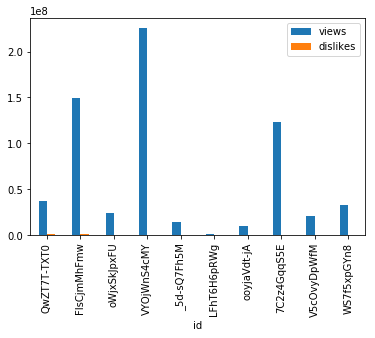

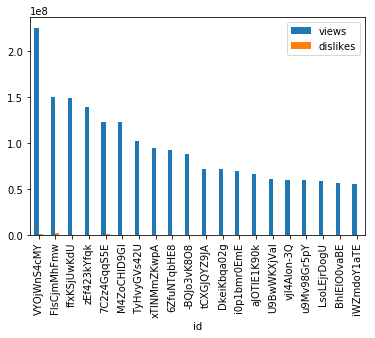

In [35]:
top100videos_dislikes_df.nlargest(20, 'dislikes').plot.bar()
top100videos_views_df2 = top100videos_views_df.nlargest(20, 'views').plot.bar()

plt.savefig("Images/Top20 Videos Views.png")

## --------------------------------------------------------------

## For Future researches 

In [36]:
# Relacion Likes and interactions

relation_likes = df["likes"]/ (df["likes"]+df["dislikes"])

# Relacion dislikes and interactions

relation_dislikes = df["dislikes"]/ (df["likes"]+df["dislikes"])

# Nivel de aprobacion
approve_level = df["likes"]/ (df["views"])

# Nivel de rechazo

rejection_level = df["dislikes"]/ (df["views"])

# Relacion comentarios y views

comment_level = df["comment_count"]/ (df["views"])

# indicador de reaccion basado en likes y dislikes. 

reaction_indicator = (df["likes"] + df["dislikes"])/ df["views"]


# una persona puede ver varias veces el video y una sola vez marcar like o dislike, 
# ademas una persona puede agregar el numero de comentarios que desee.
# dado que no tenemos forma de saber cuantas veces una persona vio un video o si dio like y comentario, o numero de comentario
# un indicador global de reaccion es:

reaction_global_indicator = (df["likes"] + df["dislikes"]+ df["comment_count"])/ df["views"]


# agregar indicadores a la data frame

df["relation_likes"] = relation_likes
df["relation_dislikes"] = relation_dislikes
df["approve_level"] = approve_level
df["rejection_level"] = rejection_level
df["comment_level"] = comment_level
df["reaction_indicator"] = reaction_indicator
df["reaction_global_indicator"] = reaction_global_indicator


In [37]:
#relation_likes_by_id = df["likes"]/ (df["likes"]+df["dislikes"])
#df["relation_likes"] = relation_likes

relation_likes_by_id = df.set_index("id").groupby(["id"]).max()["relation_likes"]

relation_dislikes_by_id = df.set_index("id").groupby(["id"]).max()["relation_dislikes"]

approve_level_by_id = df.set_index("id").groupby(["id"]).max()["approve_level"]

rejection_level_by_id = df.set_index("id").groupby(["id"]).max()["rejection_level"]

comment_level_by_id = df.set_index("id").groupby(["id"]).max()["comment_level"]

reaction_indicator_by_id = df.set_index("id").groupby(["id"]).max()["reaction_indicator"]

reaction_global_indicator_by_id = df.set_index("id").groupby(["id"]).max()["reaction_global_indicator"]


# agregar indicadores a la data frame

top100videos_views_df["likes_indicator"]=relation_likes_by_id
top100videos_views_df["dislikes_indicator"] = relation_dislikes_by_id
top100videos_views_df["approve_indicator"] = approve_level_by_id
top100videos_views_df["rejection_indicator"] = rejection_level_by_id
top100videos_views_df["comment_indicator"] = comment_level_by_id
top100videos_views_df["reaction_indicator"] = reaction_indicator_by_id
top100videos_views_df["reaction_global_indicator"] = reaction_global_indicator_by_id

#### agregar channel_title   y   category_id
top100videos_views_df.reset_index(inplace=True)
top100videos_views_df.head(10)

,id,views,dislikes,likes_indicator,dislikes_indicator,approve_indicator,rejection_indicator,comment_indicator,reaction_indicator,reaction_global_indicator
0,-0CMnp02rNY,800359,332,0.974340,0.032855,0.013722,0.000416,0.000585,0.014083,0.014652
1,-0NYY8cqdiQ,563746,54,0.987954,0.012046,0.007856,0.000096,0.000167,0.007952,0.008119
2,-1Hm41N0dUs,2058516,580,0.988143,0.013866,0.020904,0.000282,0.000951,0.021154,0.022105
3,-1yT-K3c6YI,231341,212,0.979707,0.027442,0.040306,0.000958,0.003989,0.041141,0.045130
4,-2RVw2_QyxQ,71089,27,0.950108,0.055441,0.006496,0.000380,0.000341,0.006864,0.007178
5,-2aVkGcI7ZA,2390558,1642,0.968306,0.038492,0.019100,0.000687,0.000514,0.019725,0.020238
6,-2b4qSoMnKE,291653,603,0.878880,0.137326,0.017040,0.002348,0.018998,0.019388,0.038386
7,-2wRFv-mScQ,1036300,383,0.975495,0.029284,0.014715,0.000386,0.000806,0.015085,0.015891
8,-35jibKqbEo,2425578,1522,0.990203,0.011627,0.134664,0.001332,0.011284,0.135996,0.147280
9,-37nIo_tLnk,3170,0,1.000000,0.000000,0.001262,0.000000,0.000315,0.001262,0.001577


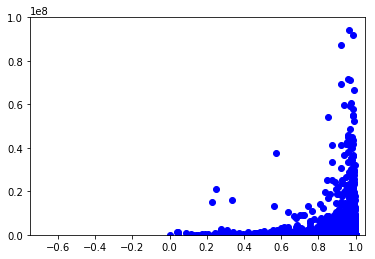

<Figure size 432x288 with 0 Axes>

In [38]:
plt.scatter(top100videos_views_df["likes_indicator"], top100videos_views_df["views"], marker="o", facecolors="blue")
x_limt = 100

9
plt.ylim(-0.75,100000000)
plt.xlim(-0.75,1.05)
plt.show()

plt.savefig("Images/Top100 Videos Views likes indicator vs views.png")

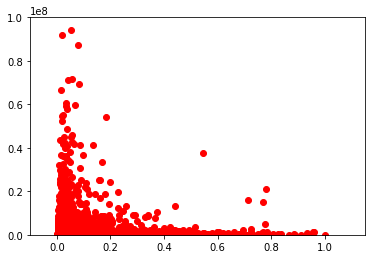

<Figure size 432x288 with 0 Axes>

In [39]:
plt.scatter(top100videos_views_df["dislikes_indicator"], top100videos_views_df["views"], marker="o", facecolors="red")
plt.ylim(-0.75,100000000)
plt.xlim(-0.1,1.15)
plt.show()
plt.savefig("Images/Top100 Videos Views dislikes indicator vs views.png")

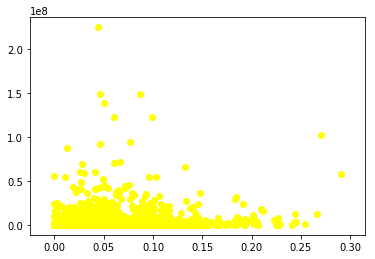

<Figure size 432x288 with 0 Axes>

In [40]:
plt.scatter(top100videos_views_df["approve_indicator"], top100videos_views_df["views"], marker="o", facecolors="yellow")
#plt.ylim(-0.75,1)
#plt.xlim(-0.75,1)
plt.show()
plt.savefig("Images/Top100 Videos Views: Approval indicator vs views.png")

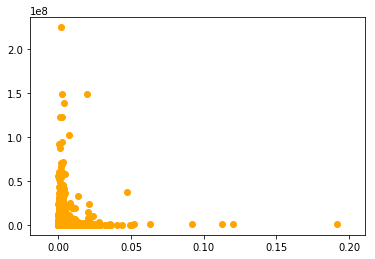

<Figure size 432x288 with 0 Axes>

In [41]:

plt.scatter(top100videos_views_df["rejection_indicator"], top100videos_views_df["views"], marker="o", facecolors="orange")
#plt.ylim(-0.75,1)
#plt.xlim(-0.75,1)
plt.show()
plt.savefig("Images/Top100 Videos Views: Rejection indicator  vs views.png")

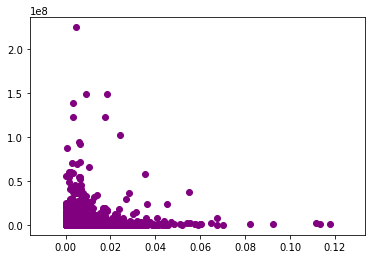

<Figure size 432x288 with 0 Axes>

In [42]:

plt.scatter(top100videos_views_df["comment_indicator"], top100videos_views_df["views"], marker="o", facecolors="purple")
#plt.ylim(-0.75,1)
#plt.xlim(-0.75,1)
plt.show()

plt.savefig("Images/Top100 Videos Views: commets indicator vs views.png")


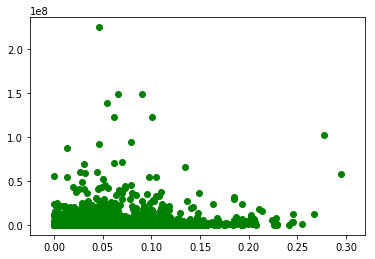

<Figure size 432x288 with 0 Axes>

In [43]:
plt.scatter(top100videos_views_df["reaction_indicator"], top100videos_views_df["views"], marker="o", facecolors="green")
#plt.ylim(-0.75,1)
#plt.xlim(-0.75,1)
plt.show()

plt.savefig("Images/Top100 Videos Views reaction indicator vs views.png")

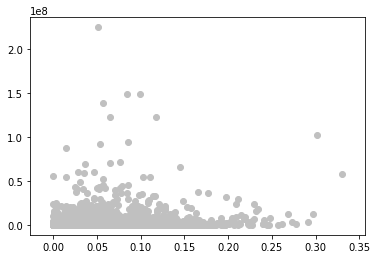

<Figure size 432x288 with 0 Axes>

In [44]:
plt.scatter(top100videos_views_df["reaction_global_indicator"], top100videos_views_df["views"], marker="o", facecolors="silver")
#plt.ylim(-0.75,1)
#plt.xlim(-0.75,1)
plt.show()
plt.savefig("Images/Top100 Videos Views reaction global indicator vs views.png")

## Question 1. Is better to have more views or being trending more days? 

In [45]:
# Filter by the video with more days as trending to compare it with the one with more views 
df.columns
df.set_index('id',inplace=True)
#top1_trending_video_views = df.loc['j4KvrAUjn6c'].max()
#top1_trending_video_likes = df.loc['j4KvrAUjn6c'].likes.max()
#top1_trending_video_dislikes = df.loc['j4KvrAUjn6c'].dislikes.max()

# Indicators to plot
top1_trending_video_relation_likes = (df.loc['j4KvrAUjn6c'].likes.max()/   
                                  (df.loc['j4KvrAUjn6c'].likes.max()+df.loc['j4KvrAUjn6c'].dislikes.max()))*100

top1_trending_video_relation_dislikes = (df.loc['j4KvrAUjn6c'].dislikes.max()/   
                                      (df.loc['j4KvrAUjn6c'].likes.max()+df.loc['j4KvrAUjn6c'].dislikes.max()))*100

top1_trending_video_approval_level = round((df.loc['j4KvrAUjn6c'].likes.max() / df.loc['j4KvrAUjn6c'].views.max())*100,1)
top1_trending_video_rejection_level = round((df.loc['j4KvrAUjn6c'].dislikes.max() / df.loc['j4KvrAUjn6c'].views.max())*100,1)


top1_views_video_relation_likes = (df.loc['VYOjWnS4cMY'].likes.max()/   
                                      (df.loc['VYOjWnS4cMY'].likes.max()+df.loc['j4KvrAUjn6c'].dislikes.max()))*100

top1_views_video_relation_dislikes = (df.loc['VYOjWnS4cMY'].dislikes.max()/   
                                      (df.loc['VYOjWnS4cMY'].likes.max()+df.loc['j4KvrAUjn6c'].dislikes.max()))*100

top1_views_video_approval_level = round((df.loc['VYOjWnS4cMY'].likes.max() / df.loc['j4KvrAUjn6c'].views.max())*100,1)
top1_views_video_rejection_level = round((df.loc['VYOjWnS4cMY'].dislikes.max() / df.loc['j4KvrAUjn6c'].views.max())*100,1)

In [46]:
# DataFrame
battle1 = { 
     'Likes Relationship' : [top1_trending_video_relation_likes,top1_views_video_relation_likes],
     'Dislikes Relationship': [top1_trending_video_relation_dislikes,top1_views_video_relation_dislikes], 
     'Approval Level' : [top1_trending_video_approval_level,top1_views_video_approval_level],
     'Disapproval Level': [top1_trending_video_rejection_level,top1_views_video_rejection_level]
}
battle1_df_transposed = pd.DataFrame(battle1)
battle1_df = battle1_df_transposed.T
battle1_df.columns = ["Top 1 Trending Video","Top 1 Views Video"]
battle1_df.style.format({
    'Likes Relationship': '{:,.2f}'.format,
})
battle1_df

,Top 1 Trending Video,Top 1 Views Video
Likes Relationship,88.659027,99.585833
Dislikes Relationship,11.340973,6.810422
Approval Level,1.600000,48.400000
Disapproval Level,0.200000,3.300000


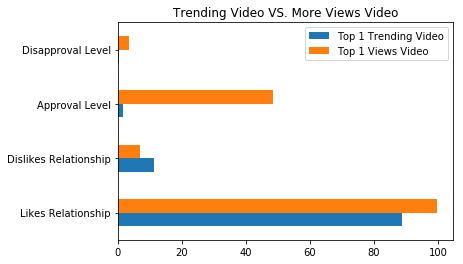

In [47]:
# Plot 
battle1_df.plot(kind='barh', title="Trending Video VS. More Views Video")
plt.savefig("Q1.Trending_video_vd_more_views_video .png")
